In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [34]:
data = pd.read_csv(r"C:\Users\97798\Desktop\datasets\Titanic-Dataset.csv")

In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

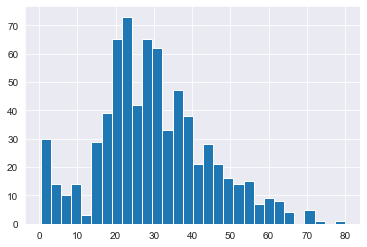

In [6]:
sns.set_style('dark')

data.Age.hist(bins = 30)

In [37]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

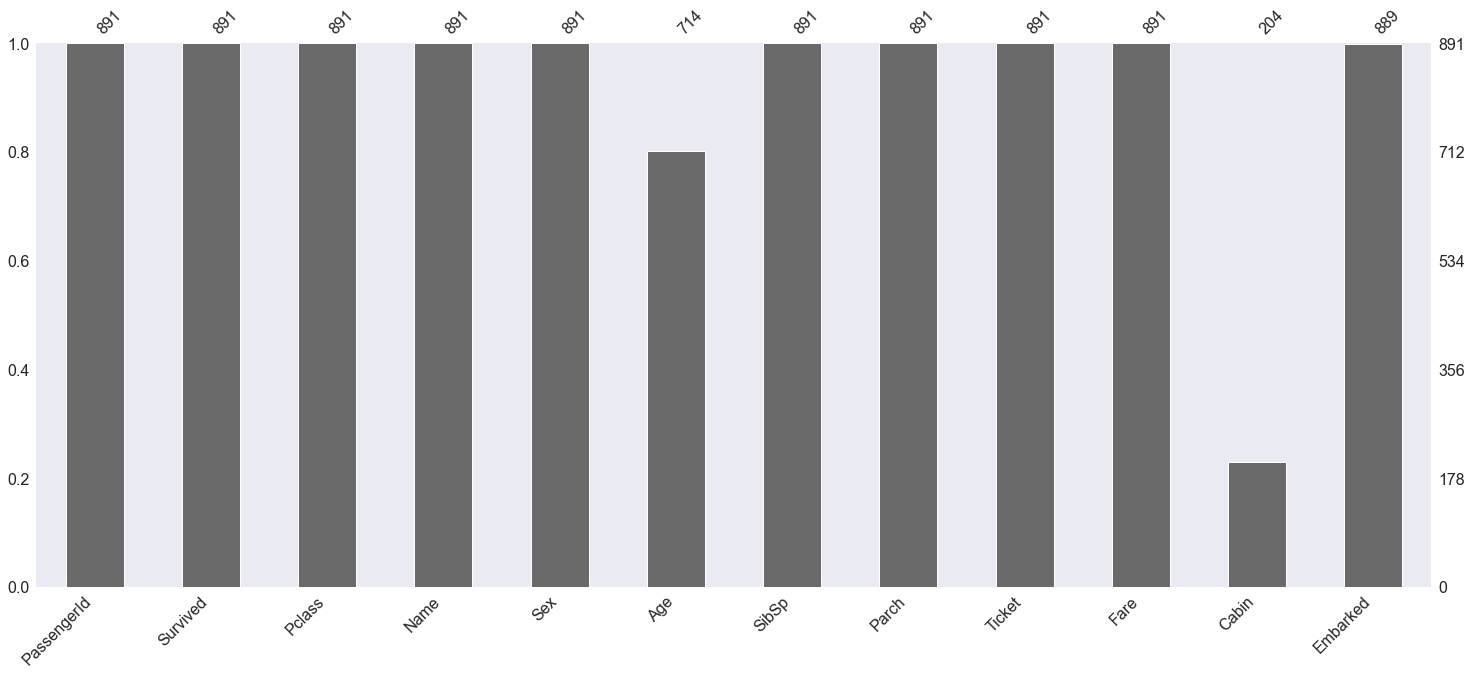

In [38]:
import missingno as msno
msno.bar(data)

<AxesSubplot:>

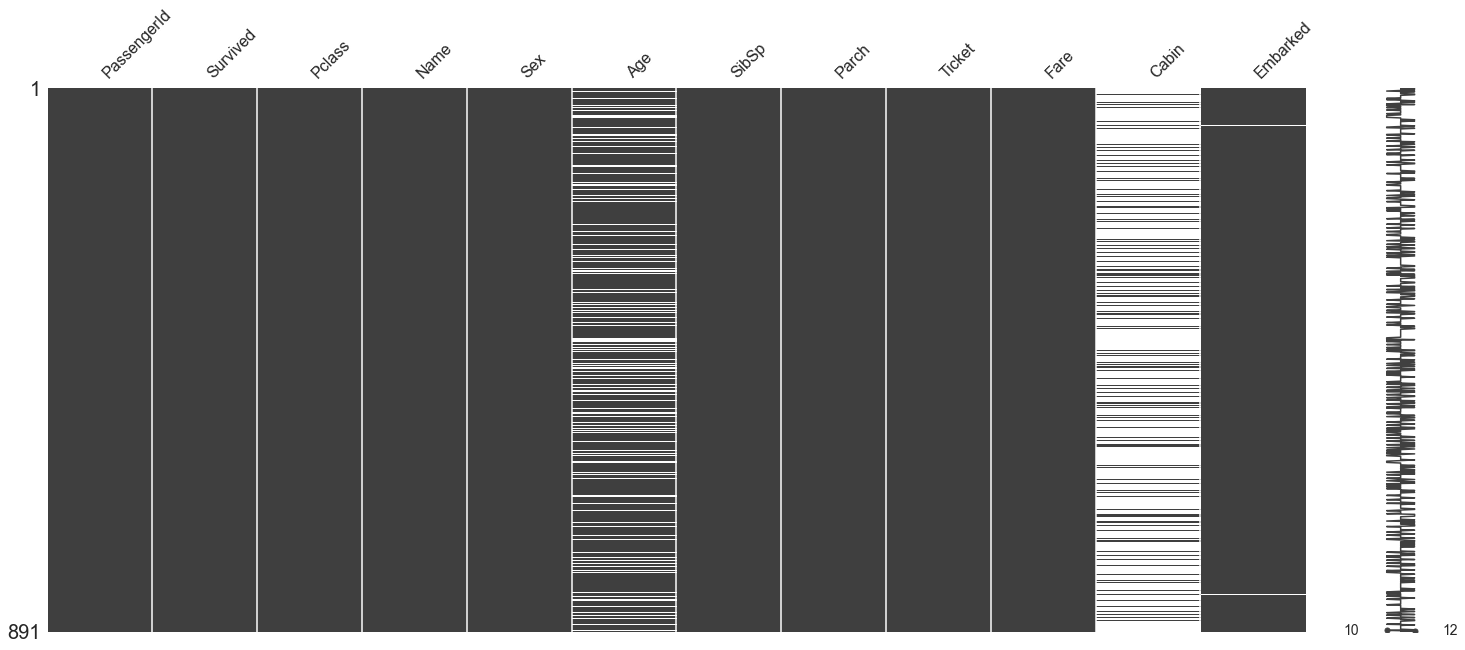

In [11]:
msno.matrix(data)

In [39]:
data.duplicated().sum()

0

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
import scipy.stats as spstats

In [42]:
selected_features = data[['Age','Sex']]

In [43]:
selected_features

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


Text(0.5, 1.0, 'Age Distribution')

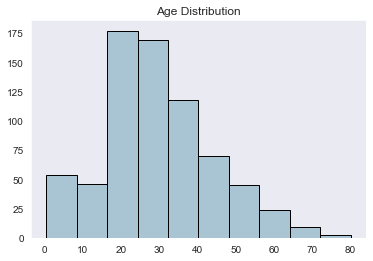

In [44]:
fig, ax = plt.subplots()

selected_features['Age'].hist(bins = 10, color = '#A9C5D3', edgecolor = 'black', grid = False)

ax.set_title('Age Distribution')

In [45]:
selected_features.Age = np.log(selected_features.Age)
selected_features

,Age,Sex
0,3.091042,male
1,3.637586,female
2,3.258097,female
3,3.555348,female
4,3.555348,male
...,...,...
886,3.295837,male
887,2.944439,female
888,NaN,female
889,3.258097,male


In [28]:
mean = selected_features.Age.mean()

In [29]:
selected_features.Age.fillna(mean, inplace = True)

In [46]:
selected_features

,Age,Sex
0,3.091042,male
1,3.637586,female
2,3.258097,female
3,3.555348,female
4,3.555348,male
...,...,...
886,3.295837,male
887,2.944439,female
888,NaN,female
889,3.258097,male


In [47]:
selected_features.isna().sum()

Age    177
Sex      0
dtype: int64

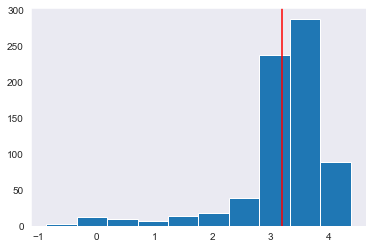

In [48]:
fig , ax = plt.subplots()

selected_features.Age.hist(
    bins = 10,
    grid = False
)

age_mean = np.round(np.mean(selected_features.Age),2)

plt.axvline(age_mean, color = 'r')

